# 第十二课 机器学习

机器学习在我们之前一套课程中，有非常经典的不编程的方法来进行教学。

然而，这种上课的方式仍然要求学生去处理Excel的公式。

显然，在有了ChatGPT协同编程之后，我们可以直接和ChatGPT沟通，用Python的来实现机器学习

并且这样我们学到的机器学习方案，可以到时候直接迁移到真实数据中。

- [ ] 对excel表格进行可视化
- [ ] 设计人类规则进行分类
- [ ] 机器学习进行分类
- [ ] 机器学习回归

## 实验一


### 读取并可视化泰坦尼克数据

我们可以先打开data/tatanic_train.csv

去看一看，这个数据是什么样的

```
PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
1	0	3	Braund, Mr. Owen Harris	male	22	1	0	A/5 21171	7.25		S
2	1	1	Cumings, Mrs. John Bradley (Florence Briggs Thayer)	female	38	1	0	PC 17599	71.2833	C85	C
```


这个表格分别记录了泰坦尼克号的乘客到最后是否幸存下来，并且有很多数据包括了他当时的仓位等级(PClass)，性别，年龄和票价(Cabin)等信息

我们可以要求ChatGPT实现一段python程序，读取这个表格，并进行可视化。

---

data/tatanic_train.csv存储了泰坦尼克号幸存者的数据

表格的前三行如下

```
PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
1	0	3	Braund, Mr. Owen Harris	male	22	1	0	A/5 21171	7.25		S
2	1	1	Cumings, Mrs. John Bradley (Florence Briggs Thayer)	female	38	1	0	PC 17599	71.2833	C85	C
```

我希望以Pclass为横轴，票价为纵轴，用两种颜色画出生存和非生存的乘客的散点图，请用python为我实现

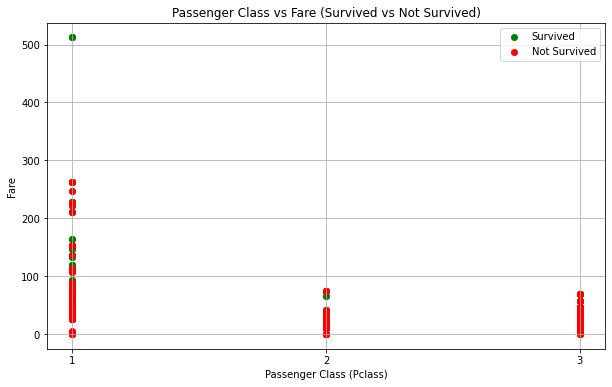

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# file_path = '/mnt/data/tatanic_train.csv' 这里需要注释掉
# 改为
file_path = 'data/tatanic_train.csv'
data = pd.read_csv(file_path)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
# Plotting survived passengers
plt.scatter(data[data['Survived'] == 1]['Pclass'], data[data['Survived'] == 1]['Fare'], color='green', label='Survived')
# Plotting non-survived passengers
plt.scatter(data[data['Survived'] == 0]['Pclass'], data[data['Survived'] == 0]['Fare'], color='red', label='Not Survived')

plt.title('Passenger Class vs Fare (Survived vs Not Survived)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Fare')
plt.xticks([1, 2, 3])  # Assuming Pclass values are 1, 2, and 3
plt.legend()
plt.grid(True)
plt.show()


其实Python中画图不仅仅有plt一种方法，我们也可以用plotly来画

```
把刚才那个作图改为plotly实现
```

In [2]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(data, x='Pclass', y='Fare', color='Survived',
                 color_discrete_map={0: 'red', 1: 'green'},
                 labels={'Survived': 'Survival Status'},
                 title='Passenger Class vs Fare (Survived vs Not Survived)',
                 category_orders={'Survived': [1, 0]})

# Update layout for better readability
fig.update_layout(
    xaxis_title='Passenger Class (Pclass)',
    yaxis_title='Fare',
    xaxis={'tickvals': [1, 2, 3]},
    legend_title='Survived'
)

# Show the plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

如果你发现没有安装plotly库的话，可以通过

```
pip install plotly -i https://mirrors.aliyun.com/pypi/simple/
```

来进行安装

In [3]:
import plotly.express as px

# Create a scatter plot using Plotly Express
fig = px.scatter(data, x='Pclass', y='Fare', color='Survived',
                 color_discrete_map={0: 'red', 1: 'green'},
                 labels={'Survived': 'Survival Status'},
                 title='Passenger Class vs Fare (Survived vs Not Survived)',
                 category_orders={'Survived': [1, 0]})

# Update layout for better readability
fig.update_layout(
    xaxis_title='Passenger Class (Pclass)',
    yaxis_title='Fare',
    xaxis={'tickvals': [1, 2, 3]},
    legend_title='Survived'
)

# Show the plot
fig.show()


可以看到plotly的图有更多交互元素，当你鼠标移动到每一个数据点的时候，会出现更多的信息

这里我们设置一个课堂练习

### 课堂练习

- 让鼠标移动到每个数据点的时候，展示乘客的姓名。

看看同学们能否和ChatGPT一同把这个给实现出来



### 回到分类

我们希望实现一个函数，输入一个乘客的属性信息，来预测这个乘客是否存活

这里我们假设用最简单的方法来实现

```
请为我进一步实现一个函数判断乘客是否存活的函数，

假设输入是pclass和fare，

分别统计表格中pclass = 1，2，3时，存活和存活的乘客的fare票价均值，并取两者平均作为阈值

如果高于平均，则返回1（存活），否则返回0
```

In [5]:
import pandas as pd

# Load the dataset
# file_path = '/mnt/data/tatanic_train.csv' 这里需要注释掉
# 改为
file_path = 'data/tatanic_train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

# Define the function that calculates whether a passenger survived based on pclass and fare

def predict_survival(pclass, fare):
    thresholds = {}
    
    # Calculate the mean fare for survivors and non-survivors for each pclass
    for pc in [1, 2, 3]:
        survived_mean_fare = df[(df['Pclass'] == pc) & (df['Survived'] == 1)]['Fare'].mean()
        not_survived_mean_fare = df[(df['Pclass'] == pc) & (df['Survived'] == 0)]['Fare'].mean()
        # Average of the two means to be used as a threshold
        thresholds[pc] = (survived_mean_fare + not_survived_mean_fare) / 2
    
    # Predict survival based on whether the fare is above or below the threshold for the given pclass
    threshold = thresholds[pclass]
    return 1 if fare > threshold else 0

# Calculate the thresholds for each class
thresholds = {pc: predict_survival(pc, df[df['Pclass'] == pc]['Fare'].mean()) for pc in [1, 2, 3]}
thresholds


{1: 1, 2: 0, 3: 0}

好像最后的测试代码有点问题，把求阈值和predict函数分开成为两个部分

In [6]:
# Function to calculate thresholds for each class based on the dataset
def calculate_thresholds(df):
    thresholds = {}
    
    # Calculate the mean fare for survivors and non-survivors for each pclass
    for pc in [1, 2, 3]:
        survived_mean_fare = df[(df['Pclass'] == pc) & (df['Survived'] == 1)]['Fare'].mean()
        not_survived_mean_fare = df[(df['Pclass'] == pc) & (df['Survived'] == 0)]['Fare'].mean()
        # Average of the two means to be used as a threshold
        thresholds[pc] = (survived_mean_fare + not_survived_mean_fare) / 2
    
    return thresholds

# Function to predict survival based on pclass, fare, and the calculated thresholds
def predict_survival(pclass, fare, thresholds):
    threshold = thresholds.get(pclass, 0)  # Default to 0 if pclass not found
    return 1 if fare > threshold else 0

# Calculate thresholds
thresholds = calculate_thresholds(df)

# Testing the predict_survival function
test_pclass = 1
test_fare = 50
predicted_survival = predict_survival(test_pclass, test_fare, thresholds)

thresholds, predicted_survival


({1: 80.1460180882353, 2: 20.734013917525775, 3: 13.682125821134903}, 0)

这里我们可以看到阈值被输出到了thresholds变量中，

这段代码中的实现的意思是pclass = 1（头等舱）且票价明显超过80的时候，判断存活，以此类推

那么这个函数在训练集上的判断准确率有多少呢？

```
这个函数在训练集（就是这个csv文件）上的判断准确率有多少呢？
```

In [7]:
# Function to evaluate the accuracy of the predict_survival function on the entire dataset
def evaluate_accuracy(df, thresholds):
    correct_predictions = 0
    
    for _, row in df.iterrows():
        pclass = row['Pclass']
        fare = row['Fare']
        actual_survival = row['Survived']
        predicted_survival = predict_survival(pclass, fare, thresholds)
        
        if predicted_survival == actual_survival:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(df)
    return accuracy

# Calculate the accuracy of the function on the training dataset
accuracy = evaluate_accuracy(df, thresholds)
accuracy


0.5937149270482603

是59.4% 这是一个还可以的结论

### 课堂练习

在我们之前一套课的设计里面，我们会要求同学去手动寻找一个规则

看看能否进一步提升判断的准确率。

我们知道实际上在泰坦尼克事件中生存下来的人并不多，所以我们可以适当提高判断为生存的阈值，比如给三者都加上五，看看是怎么样的一个准确率

In [8]:
thresholds = {1: 85, 2: 25, 3: 18}

# Function to evaluate the accuracy of the predict_survival function on the entire dataset
def evaluate_accuracy(df, thresholds):
    correct_predictions = 0
    
    for _, row in df.iterrows():
        pclass = row['Pclass']
        fare = row['Fare']
        actual_survival = row['Survived']
        predicted_survival = predict_survival(pclass, fare, thresholds)
        
        if predicted_survival == actual_survival:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(df)
    return accuracy

# Calculate the accuracy of the function on the training dataset
accuracy = evaluate_accuracy(df, thresholds)
accuracy


0.611672278338945

果然，准确率提高了一些。

当然，在事实过程中，使用人工统计规律的方法是非常低效的。这个时候，我们就可以借助机器学习算法，来自动统计规律。